# Trials (NOT IMPORTANT)

Crearemos clases para los difrentes movimientos

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(15)

In [125]:
def f_drift(t):
    return 5*t

def f_volatitility(t):
    return 2*t-2

def gbm(drift, volatility, X0, T, dt):
    N=int(T/dt)
    t=np.linspace(0,t,N+1)
    Xt=np.zeros(N+1)
    Xt[0] = X0

    dWt= np.random.normal(0, np.sqrt(dt), N)

    Ito_integral=np.zeros(N+1)
    normal_integral=np.zeros(N+1)
    Integral=np.zeros(N+1)

    for i in range(1,N+1):
        dXt = drift[i-1]*Xt*dt + volatility[i-1]*Xt*dWt
        Xt[i] = Xt[i-1]+dXt

        Ito_integral[i] = Ito_integral[i-1] + volatility(t[i-1]) * Xt[i-1]* dWt[i-1]*dt
        normal_integral[i] = normal_integral[i-1] + 0.5 * (drift(t[i-1]) * Xt[i-1] + drift(t[i]) * Xt[i]) * dt
        Integral[i] = normal_integral[i] + Ito_integral[i]

    return t, Xt, normal_integral, Ito_integral, Integral


In [57]:
class GBM:
    def __init__(self, drift, volatility, X0, T, dt, n_paths, store_processes = True):
        self.drift = drift
        self.volatility = volatility
        self.X0 =X0
        assert self.X0 > 0, "X0 must be strictly positive for the Geometric Brownian Motion"
        
        self.T=T
        self.dt=dt
        self.n_paths = n_paths
        self.simulated_paths = False #To see if there was any simulation. If not it will simualte n_paths
        self.store_processes = store_processes #Variable that tells if we store or not Xt if later we want to plot them

        #If they are inserted as functions of time
        if isinstance(drift, (int, float)):
            self.drift = lambda t: drift
        else:
            self.drift = drift
        
        if isinstance(volatility, (int, float)):
            self.volatility = lambda t: volatility
        else:
            self.volatility = volatility

        #Calculate N and vector t
        self.N = int(self.T/self.dt)
        self.t = np.linspace(0, self.T, self.N + 1)

        #Initialize the values of the process and the integrals
        Xt =np.zeros(self.N+1)
        Xt[0] =X0
        self.Xt = Xt

        self.normal_integral = np.zeros(self.N+1)
        self.Ito_integral= np.zeros(self.N+1) 
        self.integral= np.zeros(self.N+1)

        self.store_Xts = np.zeros((self.n_paths,self.N+1))
        self.store_integrals = np.zeros((self.n_paths, self.N + 1))
        
        self.final_values_Xt=np.zeros(self.n_paths)
        self.final_value_integral = np.zeros(self.n_paths)

    ###########################################
    ###Simulation of Path and Multiple Paths###
    ###########################################


    def simulate_path(self):

        dBt = np.random.normal(0, np.sqrt(self.dt), self.N)
        for i in range(1,self.N+1):
            left_dt = self.drift(self.t[i-1]) * self.Xt[i-1] * self.dt
            right_Bt = self.volatility(self.t[i-1]) * self.Xt[i-1] * dBt[i-1]

            self.normal_integral[i] = self.normal_integral[i-1] + left_dt
            self.Ito_integral[i] = self.Ito_integral[i-1] + right_Bt
            self.integral[i] = self.normal_integral[i] + self.Ito_integral[i]
            self.Xt[i] = self.X0 + self.integral[i]


    def simulate_paths(self):
        
        for i in range(self.n_paths):
            self.simulate_path()
            
            self.final_values_Xt[i] = self.Xt[-1]
            self.final_value_integral[i] = self.integral[-1]

            if self.store_processes == True:
                self.store_Xts[i] = self.Xt
                self.store_integrals[i] = self.integral

        self.simulated_paths=True


    ##################
    ###Calculations###
    ##################


    def mean(self):
        if self.simulated_paths==False:
            print("Simulating Paths since no Paths were simulated")
            self.simulate_paths()
        return np.mean(self.final_values_Xt, axis=0)
    
    def standard_dev(self):
        if self.simulated_paths==False:
            print("Simulating Paths since no Paths were simulated")
            self.simulate_paths()
        return np.std(self.final_values_Xt, axis=0)
    


    ##############
    ###Graphics###
    ##############
    

    def plot_paths(self, bins=100):
        if self.simulated_paths==False:
            print("Simulating Paths since no Paths were simulated")
            self.simulate_paths()

        fig, axis = plt.subplots(1,2,figsize=(10,6))


        for i in range(self.n_paths):
            axis[0].plot(self.t, self.store_Xts[i])
            axis[0].set_title('Geometric Brownian Motions')
            axis[0].set_xlabel('Time')
            axis[0].set_ylabel('Xt')

        axis[1].hist(self.final_values_Xt, bins, edgecolor='black')
        axis[1].set_xlabel('Final Value of Xt')
        axis[1].set_ylabel('Frequency')
        plt.show()

    def plot_random_samples(self, sample=5):
        pass

    def plot_integrals(self, bins=100):
        if self.simulated_paths==False:
            print("Simulating Paths since no Paths were simulated")
            self.simulate_paths()

        fig, axis = plt.subplots(1,2,figsize=(10,6))

 

        for i in range(self.n_paths):
            axis[0].plot(self.t, self.store_integrals[i])
            axis[0].set_title('Value of Integral of GBM')
            axis[0].set_xlabel('Time')
            axis[0].set_ylabel('Integral value')

        axis[1].hist(self.final_value_integral, bins, edgecolor='black')
        axis[1].set_xlabel('Final Value of Integral')
        axis[1].set_ylabel('Frequency')
        plt.show()


In [58]:
def drift_gbm(t):
    return 2*t
def volatility_gbm(t):
    return t

gbm = GBM(drift_gbm, volatility_gbm, 1, 1, 0.001, 1000)

In [59]:
gbm.mean()

Simulating Paths since no Paths were simulated


np.float64(2.6890872196527082)

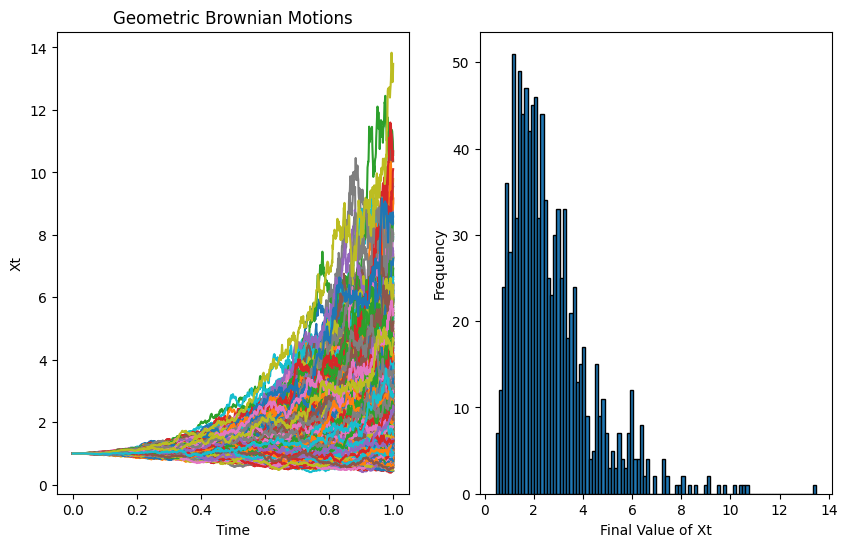

In [60]:
gbm.plot_paths()

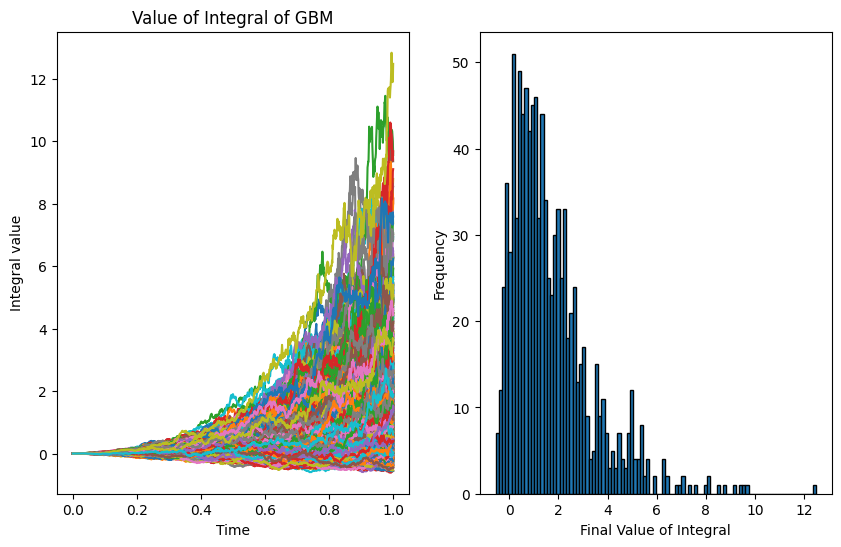

In [61]:
gbm.plot_integrals()

# Defining a Broader Class

In [84]:
class SDEModel:
    def __init__(self, drift, volatility, X0, T, dt, n_paths, store_processes = True, name="SDEModel"):
        self.drift = drift
        self.volatility = volatility
        self.X0 =X0
        assert self.X0 > 0, "X0 must be strictly positive for the Geometric Brownian Motion"
        
        self.T=T
        self.dt=dt
        self.n_paths = n_paths
        self.simulated_paths = False #To see if there was any simulation. If not it will simualte n_paths
        self.store_processes = store_processes #Variable that tells if we store or not Xt if later we want to plot them
        self.name=name #To check which process we are using

        #If they are inserted as functions of time
        if isinstance(drift, (int, float)):
            self.drift = lambda t: drift
        else:
            self.drift = drift
        
        if isinstance(volatility, (int, float)):
            self.volatility = lambda t: volatility
        else:
            self.volatility = volatility

        #Calculate N and vector t
        self.N = int(self.T/self.dt)
        self.t = np.linspace(0, self.T, self.N + 1)

        #Initialize the values of the process and the integrals
        Xt =np.zeros(self.N+1)
        Xt[0] =X0
        self.Xt = Xt

        self.normal_integral = np.zeros(self.N+1)
        self.Ito_integral= np.zeros(self.N+1) 
        self.integral= np.zeros(self.N+1)

        self.store_Xts = np.zeros((self.n_paths,self.N+1))
        self.store_integrals = np.zeros((self.n_paths, self.N + 1))
        
        self.final_values_Xt=np.zeros(self.n_paths)
        self.final_value_integral = np.zeros(self.n_paths)



    ###########################################
    ###Simulation of Path and Multiple Paths###
    ###########################################


    


    def simulate_paths(self):
        
        for i in range(self.n_paths):
            self.simulate_path()
            
            self.final_values_Xt[i] = self.Xt[-1]
            self.final_value_integral[i] = self.integral[-1]

            if self.store_processes == True:
                self.store_Xts[i] = self.Xt
                self.store_integrals[i] = self.integral

        self.simulated_paths=True


    ##################
    ###Calculations###
    ##################


    def mean(self):
        if self.simulated_paths==False:
            print("Simulating Paths since no Paths were simulated")
            self.simulate_paths()
        return np.mean(self.final_values_Xt, axis=0)
    
    def standard_dev(self):
        if self.simulated_paths==False:
            print("Simulating Paths since no Paths were simulated")
            self.simulate_paths()
        return np.std(self.final_values_Xt, axis=0)
    


    ##############
    ###Graphics###
    ##############
    

    def plot_paths(self, bins=100):
        if self.simulated_paths==False:
            print("Simulating Paths since no Paths were simulated")
            self.simulate_paths()

        fig, axis = plt.subplots(1,2,figsize=(10,6))


        for i in range(self.n_paths):
            axis[0].plot(self.t, self.store_Xts[i])
            axis[0].set_title(self.name)
            axis[0].set_xlabel('Time')
            axis[0].set_ylabel('Xt')

        axis[1].hist(self.final_values_Xt, bins, edgecolor='black')
        axis[1].set_xlabel('Final Value of Xt')
        axis[1].set_ylabel('Frequency')
        plt.show()

    def plot_random_samples(self, sample=5):
        pass

    def plot_integrals(self, bins=100):
        if self.simulated_paths==False:
            print("Simulating Paths since no Paths were simulated")
            self.simulate_paths()

        fig, axis = plt.subplots(1,2,figsize=(10,6))

 

        for i in range(self.n_paths):
            axis[0].plot(self.t, self.store_integrals[i])
            axis[0].set_title(f'Value of Integral of {self.name}')
            axis[0].set_xlabel('Time')
            axis[0].set_ylabel('Integral value')

        axis[1].hist(self.final_value_integral, bins, edgecolor='black')
        axis[1].set_xlabel('Final Value of Integral')
        axis[1].set_ylabel('Frequency')
        plt.show()

## GBM

In [76]:
class GBM(SDEModel):
    def __init__(self, X0, T, dt, n_paths, store_processes=True):
        drift = lambda t: 2*t
        volatility = lambda t: t
        super().__init__(drift, volatility, X0, T, dt, n_paths, store_processes, name="Geometric Brownian Motion")



    def simulate_path(self):
        dBt = np.random.normal(0, np.sqrt(self.dt), self.N)
        for i in range(1, self.N + 1):
            left_dt = self.drift(self.t[i - 1]) * self.Xt[i - 1] * self.dt
            right_Bt = self.volatility(self.t[i - 1]) * self.Xt[i - 1] * dBt[i - 1]
            self.normal_integral[i] = self.normal_integral[i - 1] + left_dt
            self.Ito_integral[i] = self.Ito_integral[i - 1] + right_Bt
            self.integral[i] = self.normal_integral[i] + self.Ito_integral[i]
            self.Xt[i] = self.X0 + self.integral[i]

In [ ]:
gbm = GBM(1, 1, 0.001, 1000)
gbm.mean()
gbm.plot_paths()

## Ornstein Uhlenbeck

In [87]:
class OrnsteinUhlenbeck(SDEModel):
    def __init__(self, theta, mu, sigma, X0, T, dt, n_paths, store_processes=True):
        drift = lambda t, Xt: theta * (mu - Xt)
        volatility = lambda t, Xt: sigma
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        super().__init__(drift, volatility, X0, T, dt, n_paths, store_processes, name="Ornstein Uhlenbeck")

    def simulate_path(self):
        dBt = np.random.normal(0, np.sqrt(self.dt), self.N)
        for i in range(1, self.N + 1):
            drift = self.drift(self.t[i - 1], self.Xt[i - 1]) * self.dt
            diffusion = self.volatility(self.t[i - 1], self.Xt[i - 1]) * dBt[i - 1]

            self.normal_integral[i] = self.normal_integral[i - 1] + drift
            self.Ito_integral[i] = self.Ito_integral[i - 1] + diffusion
            self.integral[i] = self.normal_integral[i] + self.Ito_integral[i]
            self.Xt[i] = self.X0 + self.integral[i]


Simulating Paths since no Paths were simulated


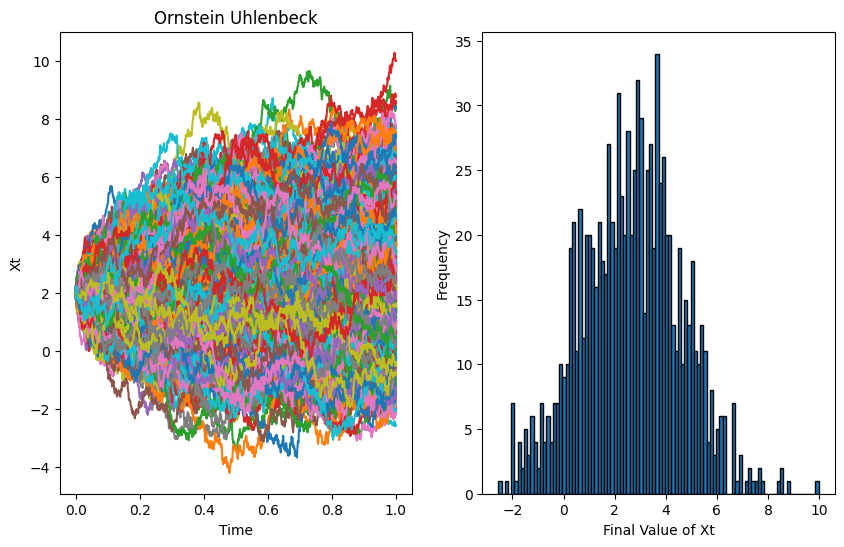

In [ ]:
ou = OrnsteinUhlenbeck(1, 3, 3, 2, 1, 0.001, 1000)
ou.mean()
ou.plot_paths()

## Cox Ingersoll Ross

In [89]:
class CIR(SDEModel):
    def __init__(self, theta, mu, sigma, X0, T, dt, n_paths, store_processes=True):
        drift = lambda t, Xt: theta * (mu - Xt)
        volatility = lambda t, Xt: sigma * np.sqrt(max(Xt, 0)) #asegurr positividad
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        super().__init__(drift, volatility, X0, T, dt, n_paths, store_processes, name="CIR")

    def simulate_path(self):
        dBt = np.random.normal(0, np.sqrt(self.dt), self.N)
        for i in range(1, self.N + 1):
            drift_term = self.drift(self.t[i - 1], self.Xt[i - 1]) * self.dt
            diffusion_term = self.volatility(self.t[i - 1], self.Xt[i - 1]) * dBt[i - 1]


            self.normal_integral[i] = self.normal_integral[i - 1] + drift_term
            self.Ito_integral[i] = self.Ito_integral[i - 1] + diffusion_term
            self.integral[i] = self.normal_integral[i] + self.Ito_integral[i]
            self.Xt[i] = max(0, self.X0 + self.integral[i]) 


Simulating Paths since no Paths were simulated


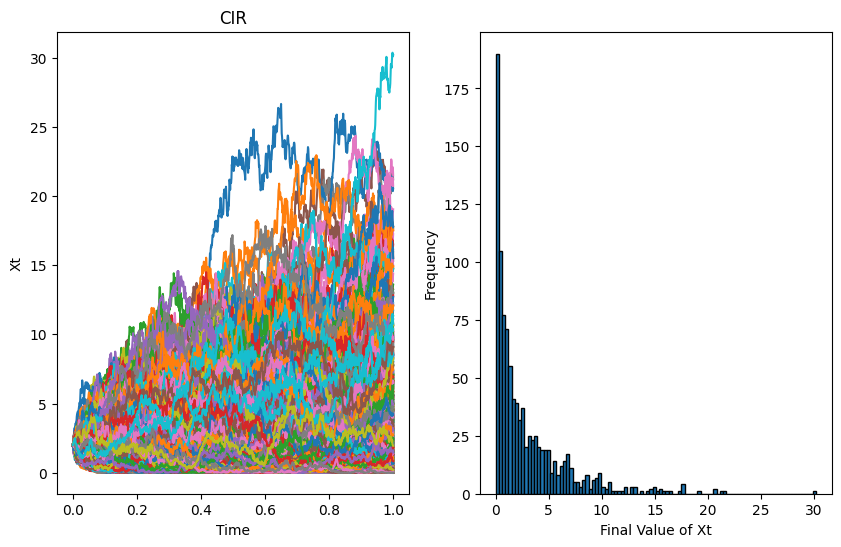

In [90]:
cir = CIR(1, 3, 3, 2, 1, 0.001, 1000)
cir.mean()
cir.plot_paths()